In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from scipy.ndimage.measurements import center_of_mass as cm
from scipy.signal import savgol_filter as sf

In [2]:
def distanzaMedia(immagine,media):
    Min=immagine.min()
    d=0
    immagine=immagine-Min
    for i in range(len(immagine)):
        for j in range(len(immagine[0])):
            d+=np.sqrt(immagine[i][j]*((media[1]-i)**2+(media[0]-j)**2))
    return d/immagine.sum()

35.95924695537113


<ErrorbarContainer object of 3 artists>

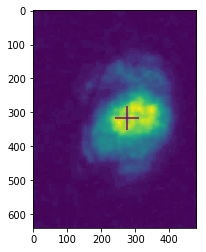

In [213]:
#questo significa che io volgio solo il canale 0, cioè il rosso
img=mpimg.imread('dati/fotogrammi/3500.jpg')[:,:,0]
cm1=cm(img)
plt.imshow(img)
#plt.plot(cm1[0],cm1[1],'o',color='black')
d=distanzaMedia(img,cm1)
print(d)
plt.errorbar(cm1[1],cm1[0],yerr=d,xerr=d,color='purple')

# Centro di massa fotogrammi
Questo pezzo di codice scrive su un file chiamato centro_di_massa.txt la posizione fotogramma per fotogramma del centro di massa

Questo codice è molto pesante Non eseguirlo!

In [50]:
#non eseguire questo codice!
lung=4325
f=open('dati/centro_di_massa.txt','a')
for i in range(lung):
    img=mpimg.imread('dati/fotogrammi/'+str(i)+'.jpg')[:,:,0]
    cm1=cm(img)
    print(cm1[0],'\t',cm1[1],file=f)
f.close()

# Distanza media fotogrammi
Questo pezzo di codice scrive su un file chiamato dist_media.txt la distanza media dal centro di massa della distribuzione di luce

Questo codice è molto pesante Non eseguirlo!

In [7]:
f=open('dati/distanza_media.txt','w+')
cm1=np.transpose(np.genfromtxt('dati/centro_di_massa.txt',unpack='True'))
for i in range(5):
    img=mpimg.imread('dati/fotogrammi/'+str(i)+'.jpg')[:,:,0]
    d=distanzaMedia(img,cm1[i])
    print(d,file=f)
    print(i)
    plt.imshow(img)
    plt.errorbar(cm1[i][1],cm1[i][0],yerr=d,xerr=d,color='purple')
    plt.savefig('immagini/video/'+str(i)+'.png')
    plt.close()
f.close()

0
1
2
3
4


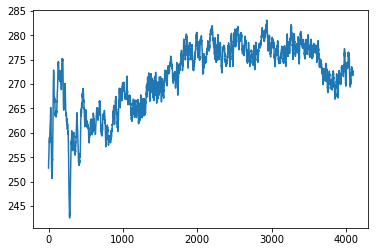

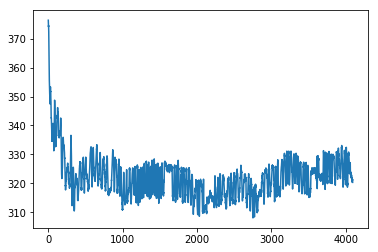

In [114]:
oscillazzioni=110

f.close()
taglio1=int(5*lung/(120+49))
taglio2=int((120+45)*lung/(120+49))
cmx,cmy=np.genfromtxt('dati/centro_di_massa.txt',unpack='True')
cmx,cmy=cmx[taglio1:taglio2],cmy[taglio1:taglio2]
iniz=1500
plt.plot(cmy)
#plt.xlim(iniz,iniz+500)
plt.show()
plt.plot(cmx)
#plt.xlim(iniz,iniz+500)

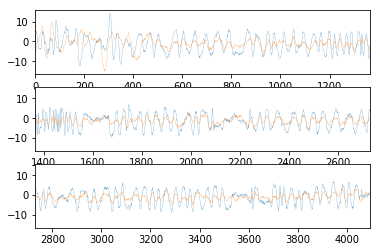

In [120]:
plt.close()
a=3
for i in range(a):
    plt.subplot(311+i)
    plt.plot(cmx-sf(cmx,501,6),linewidth=0.2)
    plt.plot(cmy-sf(cmy,501,6),linewidth=0.2)
    plt.xlim(len(cmx)*i/a,len(cmx)*(i+1)/a)

plt.savefig('centro_di_massa.eps',format='eps')

# Conteggio numero picchi

Giovanni dal video ne ha contati 110

io (sacco) ne ho contati 114 dal grafico